In [1]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=4942811895b5d44609799d411990fee418841234f00b74c8a8095fbc26d510cd
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


# **Solving the XOR problem using aeq1.gif single quantum perceptron.**

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
import numpy as np

In [3]:
theta = np.pi
alpha = -np.pi/2

In [4]:
x_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_input = np.array([[0], [1], [1], [0]])

Here is the circuit we gonna use to solve the XOR problem.
The circuit is combined of a hadamard gate a Rz gate and a Rx gate

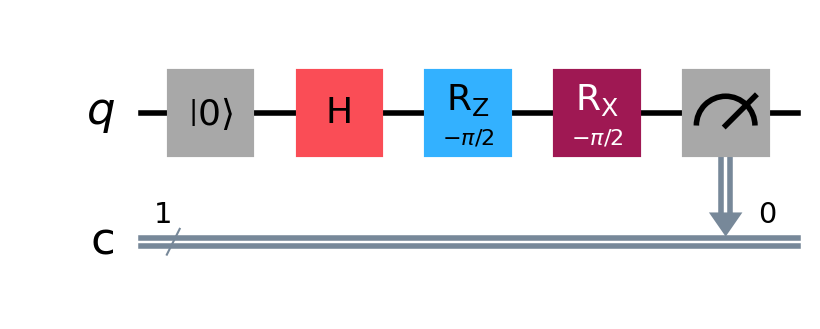

In [26]:
quantum_circuit = QuantumCircuit(1, 1)
quantum_circuit.reset(0)
quantum_circuit.h(0)
quantum_circuit.rz(x_input[0][0]*theta + alpha, 0)
quantum_circuit.rx(x_input[0][1]*theta + alpha, 0)
quantum_circuit.measure(0, 0)
quantum_circuit.draw(output='mpl', scale=2)

In [27]:
for x in x_input:
  quantum_circuit = QuantumCircuit(1, 1)
  quantum_circuit.reset(0)
  quantum_circuit.h(0)
  quantum_circuit.rz(x[0]*theta + alpha, 0)
  quantum_circuit.rx(x[1]*theta + alpha, 0)
  quantum_circuit.measure(0, 0)
  simulator = Aer.get_backend('aer_simulator')
  job = simulator.run(quantum_circuit, shots=1024)
  results = job.result()
  counts = results.get_counts()
  max_key = max(counts, key=lambda k: counts[k])
  prediction = int(max_key)
  print(f'{x[0]} xor {x[1]} = {prediction}')


0 xor 0 = 0
0 xor 1 = 1
1 xor 0 = 1
1 xor 1 = 0


# **Training a quantum perceptron to solve the XOR problem**

After proving that we can solve the xor problem using a single quantum perceptron, now we prove that we can train it to solve the XOR problem.

The quantum_perceptron function is equivelent to a forward pass in the classical MLP it simulates a quantum circuit with input paramaters then is return the value of the qubit with the highest probability of accuring after measurement.

In [28]:
def quantum_perceptron(qc, input_data, weights, bias):
    qc.reset(0)
    qc.h(0)
    qc.rz(input_data[0]*weights[0]+bias[0], 0)
    qc.rx(input_data[1]*weights[1]+bias[0], 0)
    qc.measure(0, 0)
    simulator = Aer.get_backend('aer_simulator')
    job = simulator.run(qc, shots=1024)
    results = job.result()
    counts = results.get_counts()
    max_key = max(counts, key=lambda k: counts[k])


    prediction = int(max_key)

    return prediction

The update_weights update the weights based on a simple rule:

$w := w + \eta (real  value - predictedvalue) * x$

In [29]:
def update_weights(weights, l_rate, target, prediction, feature):
    new_weights = []
    for x, w in zip(feature, weights):
        new_w = w + l_rate*(target - prediction)*x
        new_weights.append(new_w[0])
    """This line is to solve the ircuitError:
     "Invalid param type <class 'numpy.ndarray'> for gate rz." problem."""
    new_weights = np.array(new_weights)
    return new_weights

The same thing with update_bias except we do not multiply the loss with the features:

$b := b + \eta (real  value - predictedvalue)$

In [30]:
def update_bias(bias, l_rate, target, prediction):
    return bias + l_rate*(target - prediction)

We initialize the weights and the bias

In [35]:
random_weights = np.random.uniform(-4, 4, 2)

In [36]:
bias = np.random.uniform(-4, 4, 1)

Now we train our quantum perceptron with learning rate of 0.1 and 30 epochs.

In [37]:
l_rate = 0.1
epochs = 30
for _ in range(epochs):
    print(f'Epoch {_ + 1}')
    i = 0
    for data in x_input:
        qc=QuantumCircuit(1, 1)
        prediction = quantum_perceptron(qc, data, random_weights, bias)
        if prediction != y_input[i]:
            print('False')
            random_weights = update_weights(random_weights, l_rate, y_input[i], prediction, data)
            bias = update_bias(bias, l_rate, y_input[i], prediction)
        else:
            print('True')
        i += 1

Epoch 1
True
True
False
False
Epoch 2
True
True
False
False
Epoch 3
True
True
True
False
Epoch 4
True
True
True
True
Epoch 5
True
True
True
True
Epoch 6
True
True
True
True
Epoch 7
True
True
True
True
Epoch 8
True
True
True
True
Epoch 9
True
True
True
True
Epoch 10
True
True
True
True
Epoch 11
True
True
True
True
Epoch 12
True
True
True
True
Epoch 13
True
True
True
True
Epoch 14
True
True
True
True
Epoch 15
True
True
True
True
Epoch 16
True
True
True
True
Epoch 17
True
True
True
True
Epoch 18
True
True
True
True
Epoch 19
True
True
True
True
Epoch 20
True
True
True
True
Epoch 21
True
True
True
True
Epoch 22
True
True
True
True
Epoch 23
True
True
True
True
Epoch 24
True
True
True
True
Epoch 25
True
True
True
True
Epoch 26
True
True
True
True
Epoch 27
True
True
True
True
Epoch 28
True
True
True
True
Epoch 29
True
True
True
True
Epoch 30
True
True
True
True


Now we test our quantum_perceptron to see if it learned.

In [38]:
i = 0
for x in x_input:
  qc = QuantumCircuit(1, 1)
  prediction = quantum_perceptron(qc, x, random_weights, bias)
  print(f'{x[0]} xor {x[1]} = {prediction}')
  i+=1

0 xor 0 = 0
0 xor 1 = 1
1 xor 0 = 1
1 xor 1 = 0


We proved that we can solve a linearly inseparable problem using only one quantum perceptron, unlike the classical MLP that needs at least two perceptrons to solve the XOR problem.

# **Conclusion**

A quantum perceptron has the ability to solve a problem that is linearly inseparable due to the proprties of the Hilbert space.